In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [10]:
data = pd.ExcelFile('demo_data.xls')


In [11]:
df = pd.read_excel(data, 0, header = 0)
df

,X,y
0,1.860516,10.698633
1,1.346428,5.231753
2,0.880642,6.463784
3,0.409490,6.633855
4,1.781533,8.909542
...,...,...
95,0.314062,6.329773
96,1.080029,7.526305
97,0.627714,5.618190
98,1.040023,6.142768


In [12]:
x_train = df[['X']]
y_train = df[['y']]

print(x_train)
print(y_train)

           X
0   1.860516
1   1.346428
2   0.880642
3   0.409490
4   1.781533
..       ...
95  0.314062
96  1.080029
97  0.627714
98  1.040023
99  1.316501

[100 rows x 1 columns]
            y
0   10.698633
1    5.231753
2    6.463784
3    6.633855
4    8.909542
..        ...
95   6.329773
96   7.526305
97   5.618190
98   6.142768
99   7.948384

[100 rows x 1 columns]


In [23]:
y_train.shape[0]

100

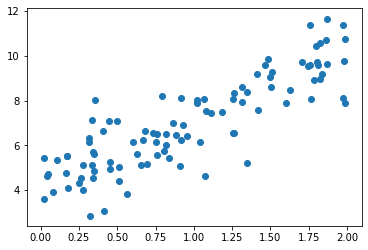

In [13]:
plt.scatter(x_train, y_train)

In [16]:
df.corr(method = 'pearson')

,X,y
X,1.000000,0.855961
y,0.855961,1.000000


# Nhận định mối quan hệ giữa X và y:
# Nhìn vào đồ thị ta thấy đồ thị có xu hướng đi lên
# Khi giá trị X tăng thì thông thường giá trị của y tăng


In [31]:
randomindex = np.random.randint(0,y_train.shape[0])
y_train.at[randomindex, 'y']

9.036017769946417

In [33]:
ain.at[randoy_train.at[randomindex, 'y'] = y_trmindex, 'y'] + 999
y_train.at[randomindex, 'y']

2007.0360177699463

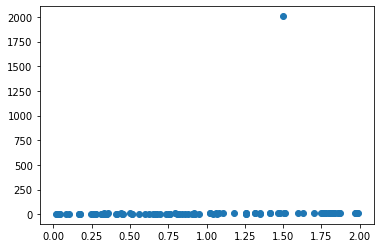

In [35]:
plt.scatter(x_train, y_train)

# sau khi thay đổi 1 giá trị của y thật khác biệt ta thấy xuất hiện 1 điểm outlier trên đồ thị làm cho mối quan hệ giữa x và y thay đổi dẫn đến đồ thị cũng bị thay đổi 1 phần
